# Задание 1. Загрузка и визуализация данных.


Используемый dataset: [Global Coffee Health Dataset](https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset) (Набор данных о здоровье и кофе)

Датасет содержит 10 000 синтетических записей, отражающих реальные показатели потребления кофе, поведение во время сна и состояния здоровья в 20 странах.

### Описание каждого значения в наборе данных.


| Столбец | Описание | Тип данных |
|-----------|-----------|-----------|
| ID  | Уникальный идентификатор  | Integer  |
| Age  | Возраст участника  | Integer  |
| Gender  | Пол участника  | Categorical  |
| Country | Страна проживания (20 стран) | Categorical |
| Coffee_Intake | Ежедневное потребление кофе в чашках (0–10) | Float |
| Caffeine_mg | Расчетное ежедневное потребление кофеина в мг (1 чашка ≈ 95 мг) | Float |
| Sleep_Hours | Среднее количество часов сна за ночь (3–10 часов) | Float |
| Sleep_Quality | Качество сна: Плохое, Среднее, Хорошее, Отличное (на основе часов сна) | Categorical |
| BMI | Индекс массы тела (15–40) | Float |
| Heart_Rate | Пульс в состоянии покоя (50–110 уд/мин) | Integer |
| Stress_Level | Уровень стресса: Низкий, Средний, Высокий (на основе часов сна и образа жизни) | Categorical |
| Physical_Activity_Hours | Еженедельная физическая активность в часах (0–15 часов) | Float |
| Health_Issues | Проблемы со здоровьем: Отсутствуют, Легкие, Умеренные, Серьезные (на основе возраста, ИМТ и сна) | Categorical |
| Occupation | Род занятий: Офис, Здравоохранение, Студент, Сфера услуг, Другое | Categorical |
| Smoking | Курение: 0 = Нет, 1 = Да | Boolean |
| Alcohol_Consumption | Употребление алкоголя: 0 = Нет, 1 = Да | Boolean |

## Написание кода
### Для начала импортируем все нужные библиотеки и загрузим датасет.

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

path = kagglehub.dataset_download("uom190346a/global-coffee-health-dataset")

df = pd.read_csv(r'/kaggle/input/global-coffee-health-dataset/synthetic_coffee_health_10000.csv')
df.info()

Using Colab cache for faster access to the 'global-coffee-health-dataset' dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 

## Строим графики

### Линейная диаграмма

Построим зависимость потребляемого кофе от пульса в состоянии покоя.

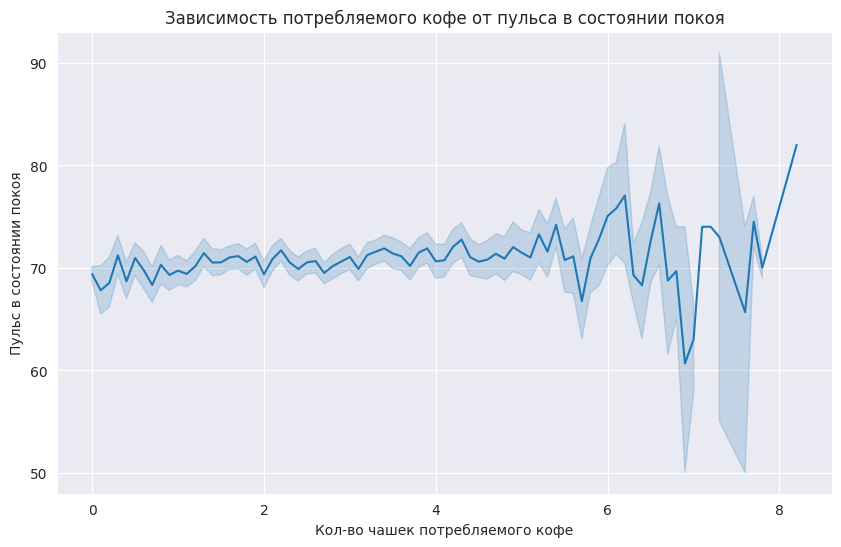

In [ ]:
# Устанавливаем чёрный сетчатый фон
sns.set_style('darkgrid')

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df,
                 x='Coffee_Intake',
                 y='Heart_Rate')

plt.xlabel("Кол-во чашек потребляемого кофе")
plt.ylabel("Пульс в состоянии покоя")
plt.title('Зависимость потребляемого кофе от пульса в состоянии покоя');


Вывод: С каждой чашкой кофе пульс понемногу увеличивается.

### Столбчатая диаграмма

Построим зависимость качества сна от количества потребляемого кофеина(в мг).

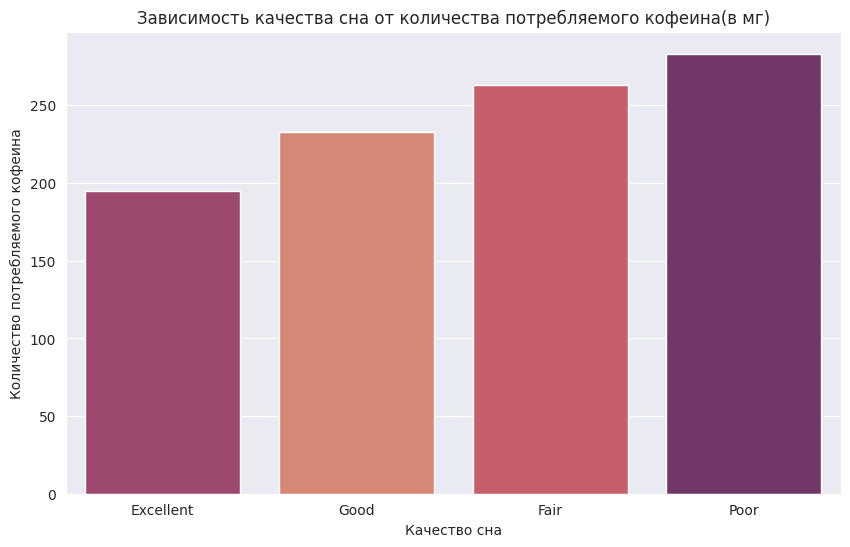

In [ ]:
# Список для сортировки показаний
sleep_quality_order = ['Excellent', 'Good', 'Fair', 'Poor']

plt.figure(figsize=(10, 6))
sns.barplot(data=df,
                 y='Caffeine_mg',
                 x='Sleep_Quality',
                 errorbar=('ci', False),
                 hue='Sleep_Quality',
                 palette="flare",
                 order=sleep_quality_order)

plt.xlabel("Качество сна")
plt.ylabel("Количество потребляемого кофеина")
plt.title('Зависимость качества сна от количества потребляемого кофеина(в мг)');

Вывод: С увеличением количества потребляемого кофеина ухудшается качество сна.

### Круговая диаграмма

Построим проценты различных родов занятий опрошенных участников.

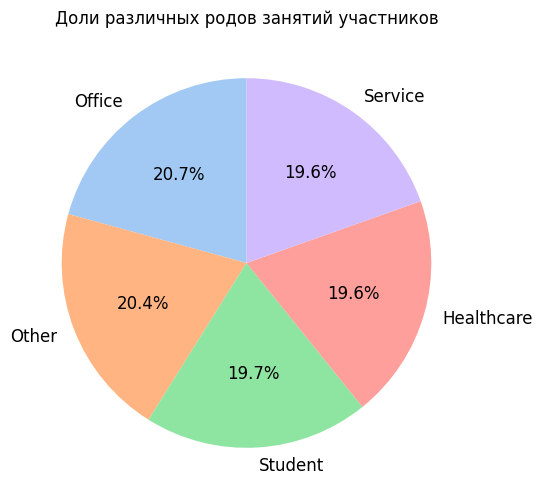

In [ ]:
plt.figure(figsize=(10, 6))
# Подсчитываем количество каждого уникального значения
data_for_pie = df.Occupation.value_counts()

plt.pie(
    data_for_pie.values,
    labels=data_for_pie.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12},
    colors=sns.color_palette('pastel')
)

plt.title('Доли различных родов занятий участников');

Вывод: Участники в датасеты равномерно распределены по роду занятий.

### Скрипичная диаграмма

Построим уровень тревожности в зависимости от количества сна.

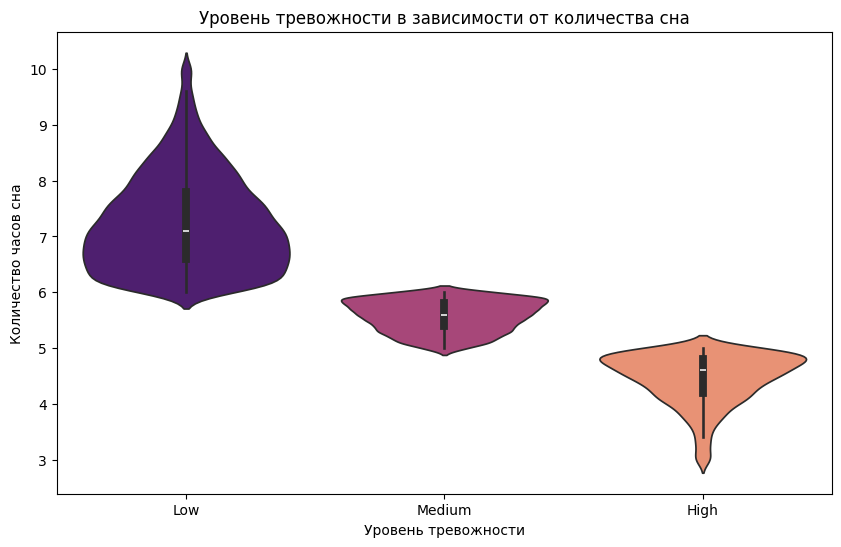

In [ ]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='Stress_Level',
               y='Sleep_Hours',
               data=df,
               hue='Stress_Level',
               palette='magma')
plt.xlabel('Уровень тревожности')
plt.ylabel('Количество часов сна')
plt.title('Уровень тревожности в зависимости от количества сна')
plt.show()

Вывод: У уменьшением количества сна увеличивается уровень тревожности.

### График карта

Построим карту со среднем уровнем потребление кофе по странам.

In [ ]:
country_stats = df.groupby('Country').agg({
    'Coffee_Intake': 'mean',
    'Caffeine_mg': 'mean',
    'Sleep_Hours': 'mean',
    'BMI': 'mean'
}).reset_index()

plt = px.choropleth(country_stats,
                   locations='Country',
                   locationmode='country names',
                   color='Coffee_Intake',
                   hover_name='Country',
                   hover_data={'Caffeine_mg': ':.1f', 'Sleep_Hours': ':.1f'},
                   title='Среднее потребление кофе по странам',
                   color_continuous_scale='Reds')
plt.show()

Вывод: США, Китай, Бразилия, Испания, Великобритания и Норвегия пьют больше всего кофе в опросе.

### Диаграмма рассеяния

Построим взаимосвязь потребления кофе и часов сна.

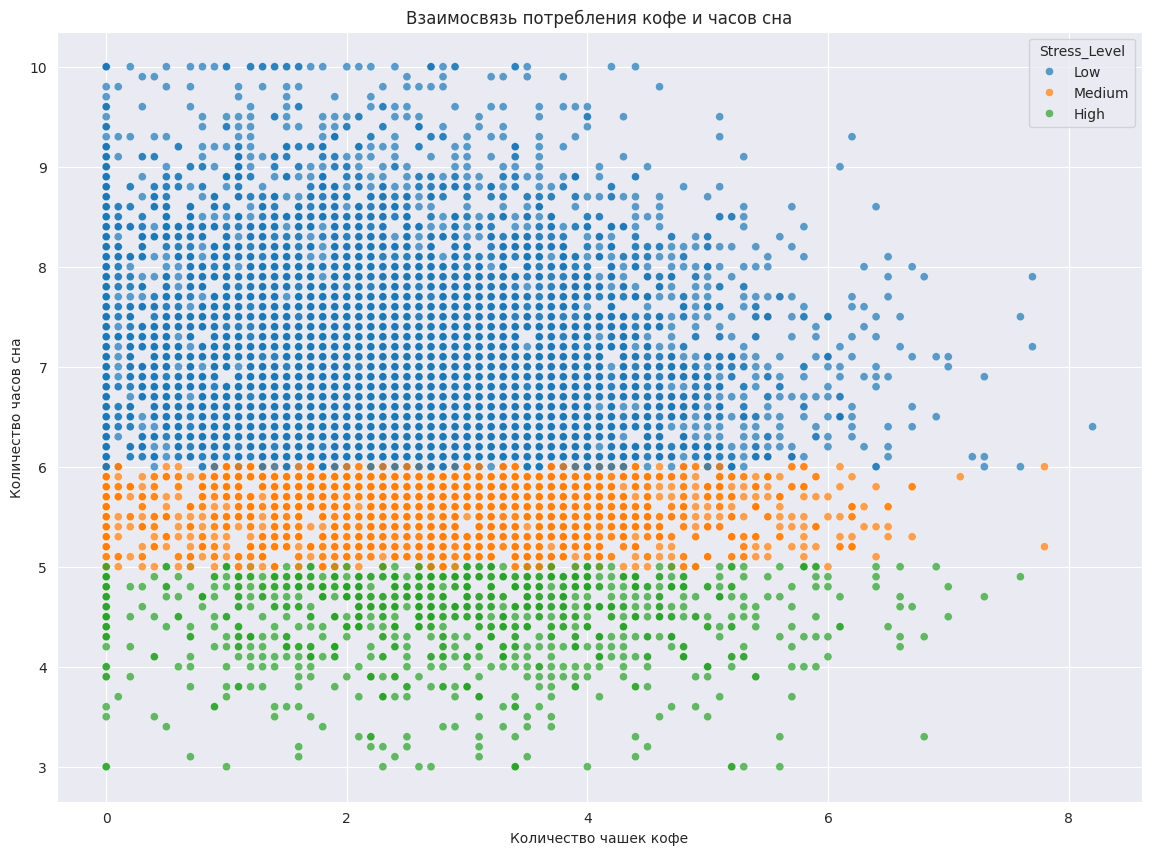

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 10))

sns.scatterplot(data=df,
                x='Coffee_Intake',
                y='Sleep_Hours',
                hue='Stress_Level',
                alpha=0.7)
plt.xlabel('Количество чашек кофе')
plt.ylabel('Количество часов сна')
plt.title('Взаимосвязь потребления кофе и часов сна')
plt.show()

Чем больше человек спит и если пьёт меньше 4-5 чашек кофе, его уровень тревожности будет низким.

### Матрица корреляции

Построим матрицу корреляции числовых показателей.

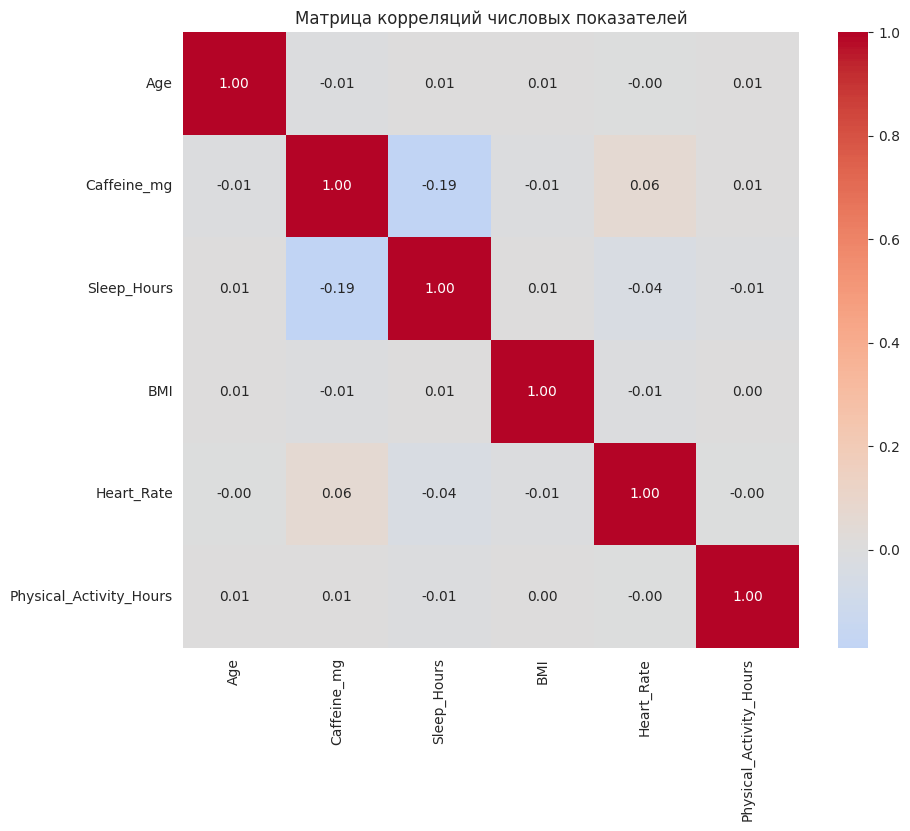

In [ ]:
numeric_cols = ['Age', 'Caffeine_mg', 'Sleep_Hours',
                'BMI', 'Heart_Rate', 'Physical_Activity_Hours']

plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Матрица корреляций числовых показателей')
plt.show()

Вывод: Чем больше кофеина потребляем человек, тем меньше он спит.

### Матрица Jointplot

Построим взаимосвязь потребления кофе и качества сна с учетом уровня стресса.

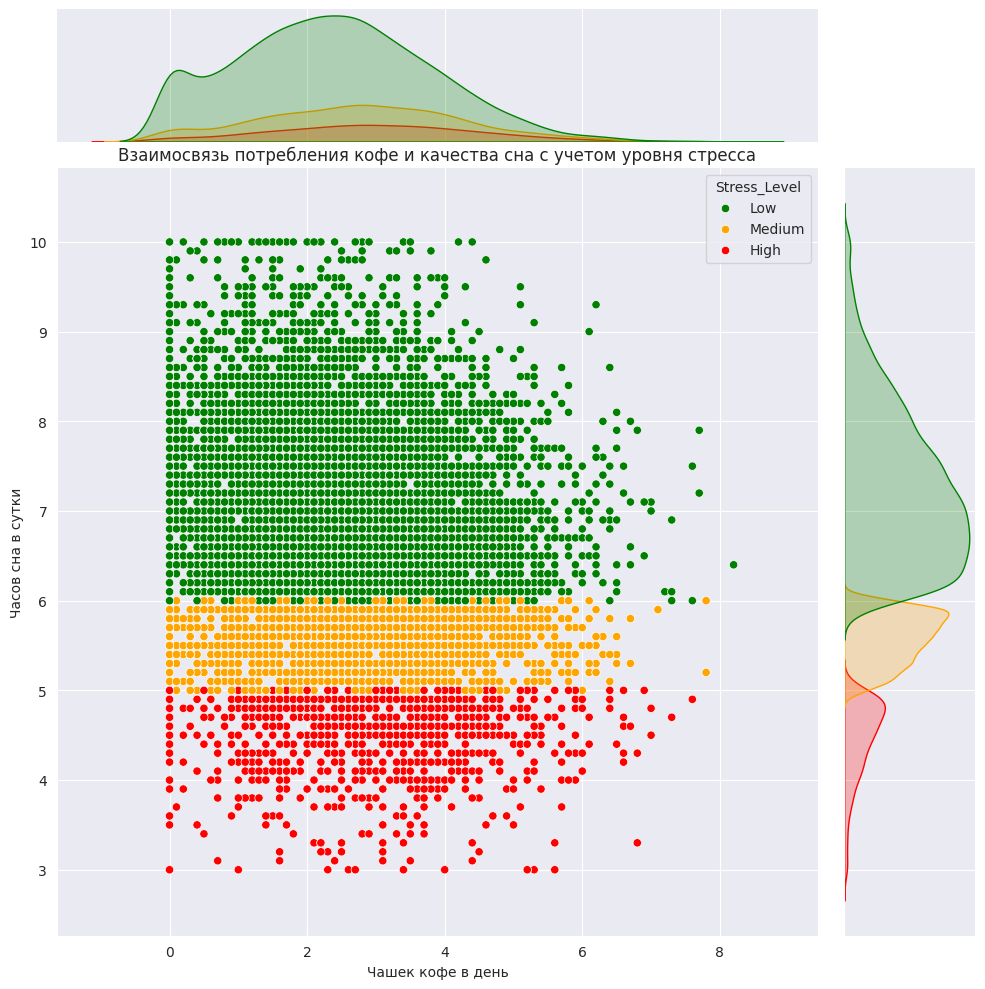

In [ ]:
sns.jointplot(data=df,
              x='Coffee_Intake',
              y='Sleep_Hours',
              hue='Stress_Level',
              palette={'Low': 'green', 'Medium': 'orange', 'High': 'red'},
              height=10)

plt.xlabel('Чашек кофе в день')
plt.ylabel('Часов сна в сутки')
plt.title('Взаимосвязь потребления кофе и качества сна с учетом уровня стресса')
plt.show()